In [9]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import matplotlib.pyplot as plt

In [10]:
file_shp = '/Users/guoqiang/Research/CTSM/CAMELS_basins/ESMFmesh_ctsm_HCDN_nhru_final_671.buff_fix_holes_polygons_simplified_5e-4_split_nested.shp'
shp = gpd.read_file(file_shp)
shp

,SeanID,lon_cen,lat_cen,geometry
0,0,-82.178066,35.637384,"POLYGON ((-82.20741 35.73036, -82.19755 35.736..."
1,1,-82.114207,35.518065,"POLYGON ((-82.06524 35.61368, -82.06049 35.610..."
2,2,-82.222376,35.776716,"POLYGON ((-82.21895 35.84327, -82.20822 35.846..."
3,3,-81.570594,35.665571,"POLYGON ((-81.43243 35.70994, -81.42207 35.709..."
4,4,-81.622726,35.595631,"POLYGON ((-81.59646 35.62712, -81.59125 35.624..."
...,...,...,...,...
666,666,-91.859764,39.818738,"POLYGON ((-92.20946 39.97214, -92.21243 39.976..."
667,667,-108.545874,39.895419,"POLYGON ((-108.54239 39.93058, -108.53277 39.9..."
668,668,-86.760362,39.912913,"POLYGON ((-86.94106 39.80830, -86.94834 39.801..."
669,669,-98.466195,39.910360,"POLYGON ((-98.70364 39.94128, -98.69990 39.945..."


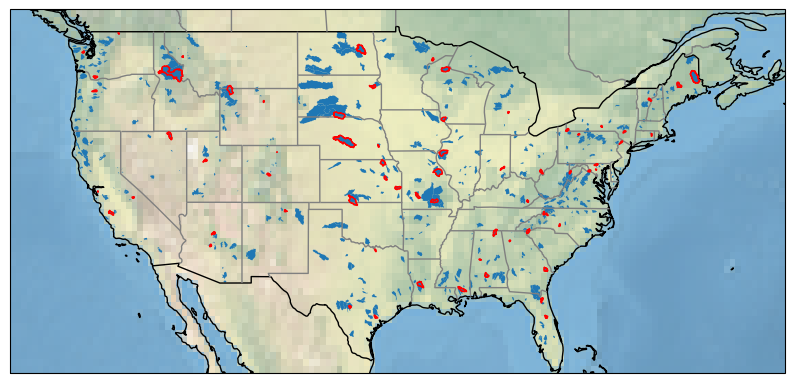

In [41]:
plt.figure(figsize=[10, 6])

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-130, -60, 25, 45])

# Put a background image on for nice sea rendering.
ax.stock_img()

SOURCE = 'Natural Earth'
LICENSE = 'public domain'

# Background boundaries
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax.add_feature(states_provinces, edgecolor='gray')

# basins
shp.plot(ax=ax)

# selected basins
shp[10::10].boundary.plot(ax=ax, color='r', linewidth=1)

# plt.savefig('CAMELS_basins.png', dpi=600, bbox_inches='tight', pad_inches=0)
# plt.show()